## Business Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

In [18]:
df = pd.read_csv('cleaned_census.csv')

In [19]:
# Convert to datetime format to for use in visuals
df['start_date'] = pd.to_datetime(df['start_date'])

## Business Strategy # 1: Leverage the influx of new employees starting in January to increase revenue.
### Tailored Insurance Packages:
- Create Specialized Packages: Develop insurance packages tailored to the needs of employees starting in January.
- Targeted Campaigns: Launch targeted digital marketing campaigns to reach new employees starting in January.
- Discounted pricing for insurance package for employees starting in January to maximize on number of employees.
### Key Performance Indicators (KPIs):
- Revenue Growth: Measure revenue growth from January starters subscribing to union insurance packages.
- Retention Rate: Monitor retention of January starters who maintain their insurance packages.
- Customer Satisfaction Score (CSAT): Measure satisfaction among January starters with their insurance packages.

C:\Users\james\AppData\Local\Temp\ipykernel_30748\105636742.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('winter')


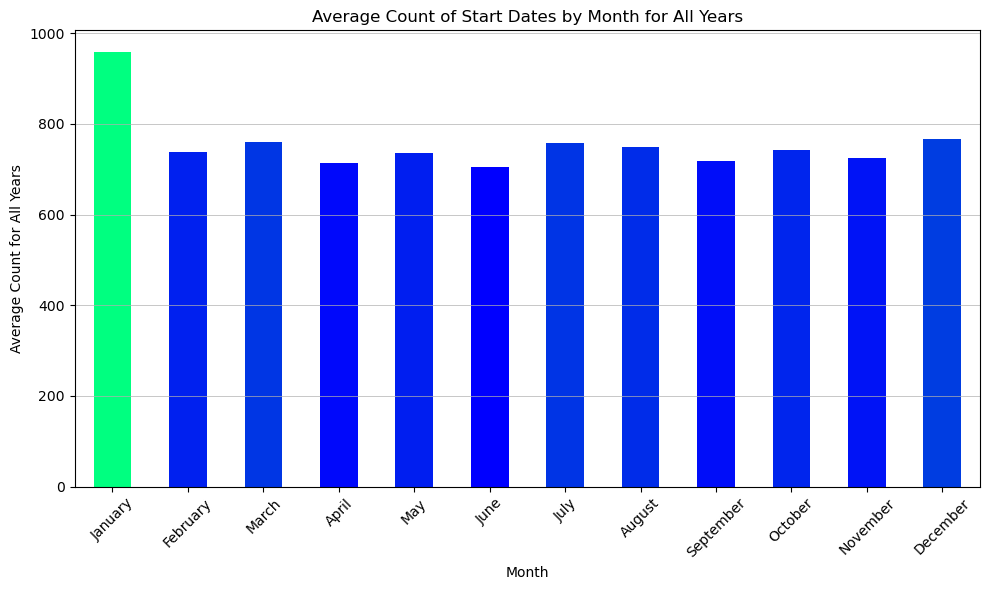

In [20]:
# Step 3: Extract month from 'start_date'
df['month'] = df['start_date'].dt.month

# Step 4: Group by month and calculate average count of start dates
monthly_counts = df.groupby('month')['start_date'].count()
average_monthly_counts = monthly_counts / df['start_date'].dt.year.nunique()

# Step 5: Plot the graph
plt.figure(figsize=(10, 6))

# Generate colors from the plasma colormap
norm = Normalize(vmin=average_monthly_counts.min(), vmax=average_monthly_counts.max())
cmap = get_cmap('winter')
colors = cmap(norm(average_monthly_counts))

# Plotting the bar chart with the plasma colormap
average_monthly_counts.plot(kind='bar', color=colors)

# Adding titles and labels
plt.title('Average Count of Start Dates by Month for All Years')
plt.xlabel('Month')
plt.ylabel('Average Count for All Years')
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(axis='y', linestyle='-', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show();

## Strategy #1, Start Date trends by Year:
- We can apply any of the above steps for specific months. Below is another look at each year's monthly surge in new employees. 
- For example in 2020 there was a surge in new employees in July for all employees. By following these trends we can identify future surges to initiate campaigns around these months.

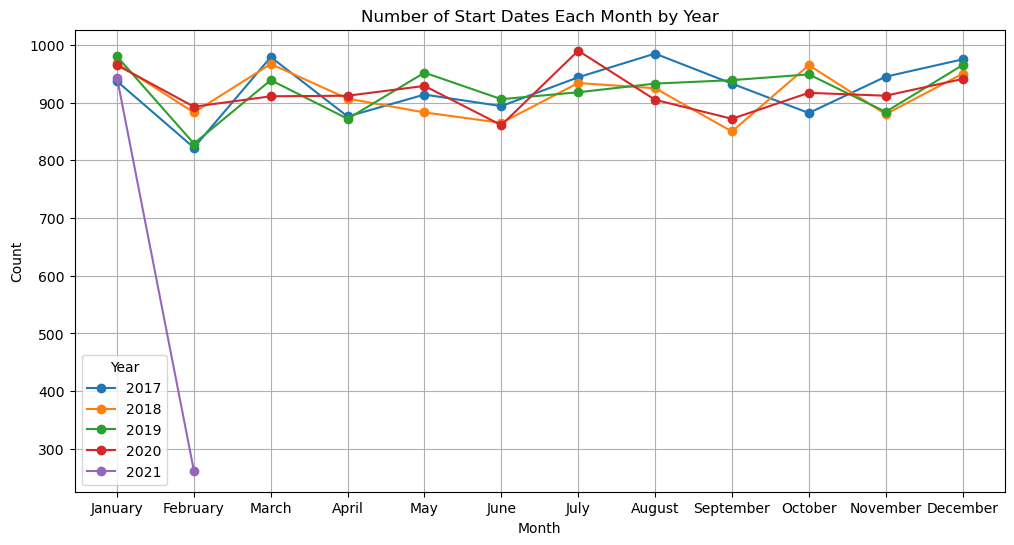

In [21]:
# Extract year and month
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month

# Group by year and month to get counts
monthly_trends = df.groupby(['year', 'month']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_table = monthly_trends.pivot(index='month', columns='year', values='count')

# Plot the data
plt.figure(figsize=(12, 6))
for year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[year], marker='o', label=str(year))

plt.title('Number of Start Dates Each Month by Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Year')
plt.grid(True)
# Add months as axes
plt.xticks(ticks=range(1, 13), labels=[
           'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show();

## Business Strategy # 2: Increase revenue by targeting employers with the most employees and the highest total salary.
- Company XYZ Inc has the highest concentraion of employees as well as largest total of salaries for each year.
- Prioritize employers who are likely to provide the highest premiums for union insurance packages based on their workforce size and salary totals.
- By focusing on employers with the most employees and highest salary totals, the union insurance company can strategically increase revenue and market share.
### Conclusion: This strategy outlines an approach to targeting, engaging, and servicing large employers, thereby enhancing the company's position in the insurance market.

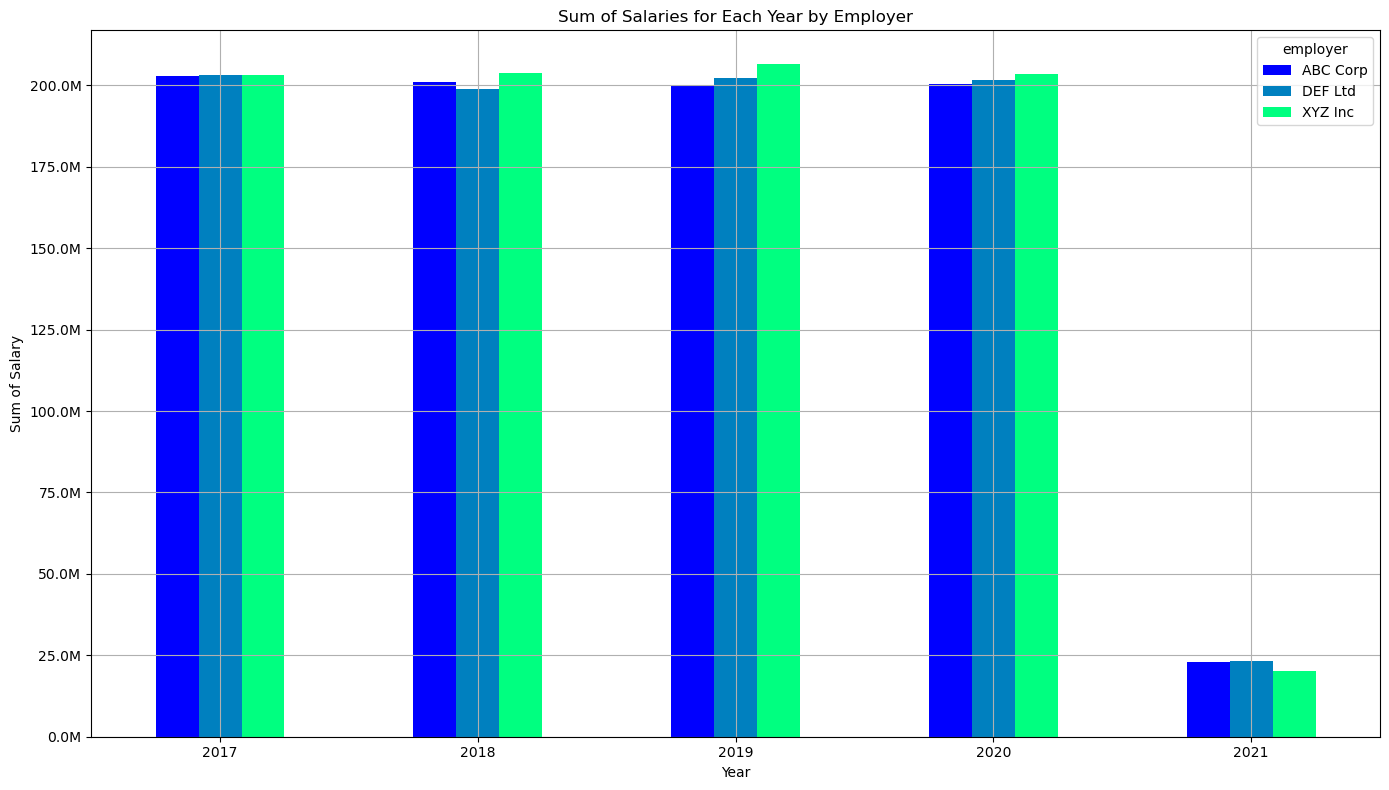

In [22]:
from matplotlib.ticker import FuncFormatter

# Extract the year from the start_date column
df['year'] = df['start_date'].dt.year

# Group by year and employer, and calculate the sum of salaries
grouped = df.groupby(['year', 'employer'])['salary'].sum().unstack()

# Function to format the y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = FuncFormatter(millions)

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))
grouped.plot(kind='bar', stacked=False, colormap='winter', ax=ax)

# Add titles and labels
plt.title('Sum of Salaries for Each Year by Employer')
plt.xlabel('Year')
plt.ylabel('Sum of Salary')
plt.xticks(rotation=0)
plt.grid(True)
ax.yaxis.set_major_formatter(formatter)  # Set the y-axis formatter
plt.tight_layout()

# Show the plot
plt.show()

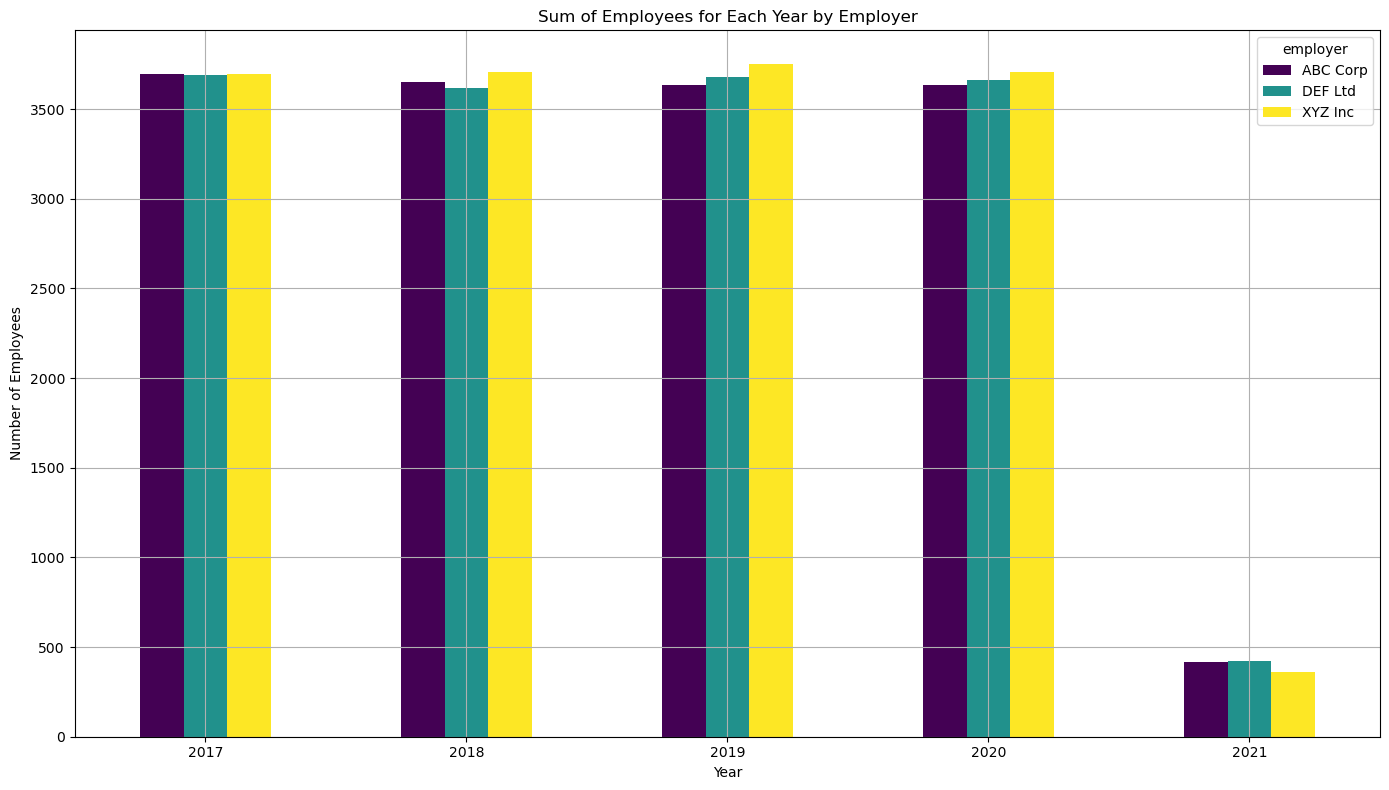

In [23]:
# Extract the year from the start_date column
df['year'] = df['start_date'].dt.year

# Group by year and employer, and count the unique member_id's
grouped = df.groupby(['year', 'employer'])['member_id'].nunique().unstack()

# Function to format the y-axis labels
def format_num(x, pos):
    'The two args are the value and tick position'
    return '%1.0f' % (x)

# Create a formatter
formatter = FuncFormatter(format_num)

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))
grouped.plot(kind='bar', stacked=False, colormap='viridis', ax=ax)

# Add titles and labels
plt.title('Sum of Employees for Each Year by Employer')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(formatter)  # Set the y-axis formatter
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Business Strategy #3: Creating Insurance Packages Based on Average Employment Time
### Objective: Develop tailored insurance packages for employees based on the average length of employment at their respective companies.
- By knowing how long employees stay at companies on average and getting a quantified insight at employee loyalty, we can tailor pricing and insurance packages to each employer.
- This would not apply to this data as these companies appear to have the same averages. 

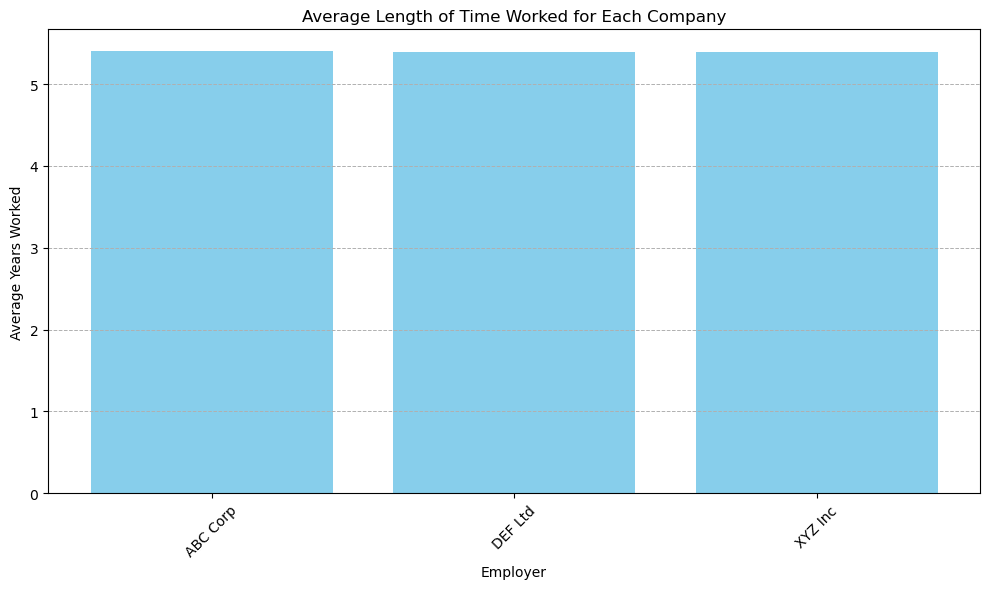

In [25]:
avg_length_worked = df.groupby('employer')['length_worked_yrs'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_length_worked['employer'], avg_length_worked['length_worked_yrs'], color='skyblue')
plt.title('Average Length of Time Worked for Each Company')
plt.xlabel('Employer')
plt.ylabel('Average Years Worked')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [26]:
# Avg length report
avg_length_worked = df.groupby('employer')['length_worked_yrs'].mean().reset_index()

# Print report
print("Average Length of Time Worked for Each Company:\n")
for index, row in avg_length_worked.iterrows():
    print(f"{row['employer']}: {row['length_worked_yrs']:.2f} years")

Average Length of Time Worked for Each Company:

ABC Corp: 5.40 years
DEF Ltd: 5.40 years
XYZ Inc: 5.40 years


## Future Analysis: Machine Learning
- Linear Regression: If we are able to acquire more demographic info for each member, we can use a linear regression algorithm to predict how long an employee will stay at that company. 
- ARIMA Timeseries Model: With more data, we can predict what an employee's salary will be in the future.
- KMeans Clustering: This model can show clusters of particular employee attributes by local number, employer, or geographical information which will allow us to identify employee profiles to target. 